## Analyze datasets from ion beam imaging

In this example, we're analyzing a experimental datasets from NanoSIMS/MIBI and extract movies from sequential scans, followed by STIRM-like localization analysis (the code is from original STORM projects)

### Configuring the directory
Create an empty directory somewhere on your computer and tell Python to go to that directory.

In [15]:
import os

os.chdir(r"\Users\Administrator\Documents\REVORGDATA\paper\extractionScripts")
print(os.getcwd())

C:\Users\Administrator\Documents\REVORGDATA\paper\extractionScripts


### Create a tif movie from the tif images

<Frames>
Source: movie.tif
Length: 21 frames
Frame Shape: (768, 768)
Pixel Datatype: uint16


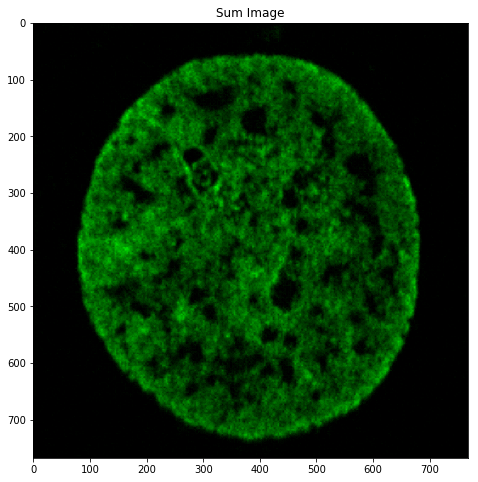

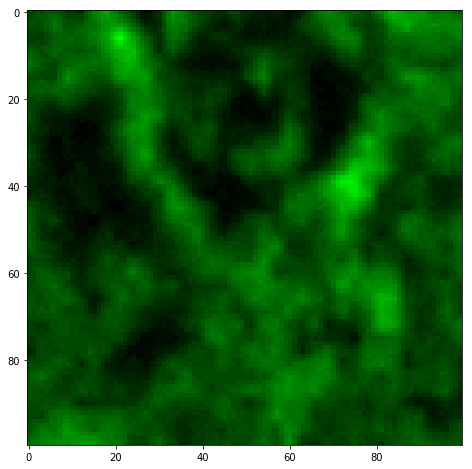

(100, 100, 3)


In [16]:
import glob
import tifffile
import numpy as np

tif_files = glob.glob(os.path.join(r"C:\Users\Administrator\Documents\REVORGDATA\paper\extractedData\chromatin\sequenceiduchromatin", "*.tif"))


#tif_filesr= blob_log(tif_files[:], max_sigma=30, num_sigma=10, threshold=.01)

with tifffile.TiffWriter("movie.tif") as tf:
    for fname in sorted(tif_files):
        image = tifffile.imread(fname)
        tf.save(image)

#!pip install pims
import pims
imstack=pims.open('movie.tif')
print(imstack)
imstack=np.array(imstack,np.uint32)
imsum=np.sum(imstack,axis=0)

image=imsum
imsum = 255*(image - np.min(image))/np.ptp(image).astype(int)

#print(imsum)

import matplotlib
import matplotlib.pyplot as pyplot

dim = np.zeros((768,768))

im=imsum
#Rsumcrop = im.crop((195,310,375,490))

#select blue color for the image display and save
Rsum = np.stack((dim,im, dim), axis=2)/255;

fig=pyplot.figure(figsize = (8, 8))
pyplot.title("Sum Image")
pyplot.imshow(Rsum)

import matplotlib

matplotlib.image.imsave('chromatin-forfig1-idu-sumcolor-whole.tiff',Rsum)



from PIL import Image
import numpy as np

from PIL import Image
im = Image.open('chromatin-forfig1-idu-sumcolor-whole.tiff')
im = im.crop((250,250,350,350))

img = im



color=(0, 255, 0)
x = np.array(img)
r, g, b, a = np.rollaxis(x, axis=-1)
g[a == 0] = color[0]

im=g


dim = np.zeros((100,100))

#select blue color for the image display and save
R = np.stack((dim,im, dim), axis=2)/255;

fig=pyplot.figure(figsize = (8, 8))
pyplot.imshow(R)
pyplot.show()
print(R.shape)



import matplotlib

matplotlib.image.imsave('chromatin-fig1-idu-sumcolor-smal.tiff', R)



rgb = np.zeros((255, 255, 3), dtype=np.uint8)
rgb[..., 0] = np.arange(255)
rgb[..., 1] = 55
rgb[..., 2] =  1- np.arange(255)



### Create an XML file for analysis

In [18]:
import storm_analysis.sa_library.parameters as parameters

params = parameters.ParametersDAO()

# Analyze the whole movie.
params.changeAttr("max_frame", -1)    
params.changeAttr("start_frame", -1)

params.changeAttr("background_sigma", 8.0)

# These were specified on the website for this dataset.
params.changeAttr("camera_gain", 1.0)
params.changeAttr("camera_offset", 0.9)

# Since this parameter can be either a float or an int we need
# to specify which type we want it to be.
params.changeAttr("find_max_radius", 5, node_type = "float")

params.changeAttr("foreground_sigma", 1.0)
params.changeAttr("iterations", 20)
params.changeAttr("model", "2dfixed")
params.changeAttr("pixel_size", 35.0)
params.changeAttr("roi_size", 10)

# Convert from FWHM in nanometers to sigma in pixels.
params.changeAttr("sigma", 150.1/(35.0 * 2.355))
params.changeAttr("threshold", 0.9)

# Don't do tracking.
params.changeAttr("radius", "0.0")
params.changeAttr("descriptor", "1")

# Don't do drift-correction.
params.changeAttr("drift_correction", 0)

params.toXMLFile("analysis.xml", pretty = True)

### Analyze the data

In [19]:
import storm_analysis.daostorm_3d.mufit_analysis as mfit

# Delete any stale results.
if os.path.exists("movie.hdf5"):
    os.remove("movie.hdf5")
    
%time mfit.analyze("movie.tif", "movie.hdf5", "analysis.xml")


Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 3548 3548
 Removing values < 1.0 in frame 1
Frame: 1 3696 7244
 Removing values < 1.0 in frame 2
Frame: 2 3732 10976
 Removing values < 1.0 in frame 3
Frame: 3 3716 14692
 Removing values < 1.0 in frame 4
Frame: 4 3775 18467
 Removing values < 1.0 in frame 5
Frame: 5 3806 22273
 Removing values < 1.0 in frame 6
Frame: 6 3783 26056
 Removing values < 1.0 in frame 7
Frame: 7 3815 29871
 Removing values < 1.0 in frame 8
Frame: 8 3811 33682
 Removing values < 1.0 in frame 9
Frame: 9 3775 37457
 Removing values < 1.0 in frame 10
Frame: 10 3876 41333
 Removing values < 1.0 in frame 11
Frame: 11 3729 45062
 Removing values < 1.0 in frame 12
Frame: 12 3711 48773
 Removing values < 1.0 in frame 13
Frame: 13 3856 52629
 Removing values < 1.0 in frame 14
Frame: 14 3643 56272
 Removing values < 1.0 in frame 15
Frame: 15 3425 59697
 Removing values < 1.0 in frame 16
Frame: 16 2996 62693
 Removing values < 1.0 in frame 17
Frame: 17 2781 65474


### Check analysis of a single frame

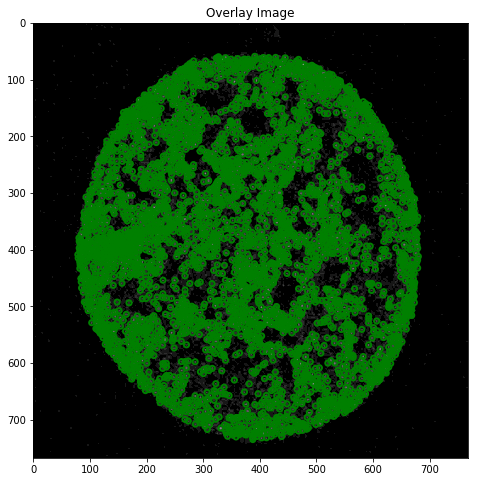

In [20]:
import storm_analysis.jupyter_examples.overlay_image as overlay_image
overlay_image.overlayImage("movie.tif", "movie.hdf5", 5)
#fig.savefig("srimbefore.tiff")

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

### Create an image of the analysis

Tracks not found, using localizations.
.


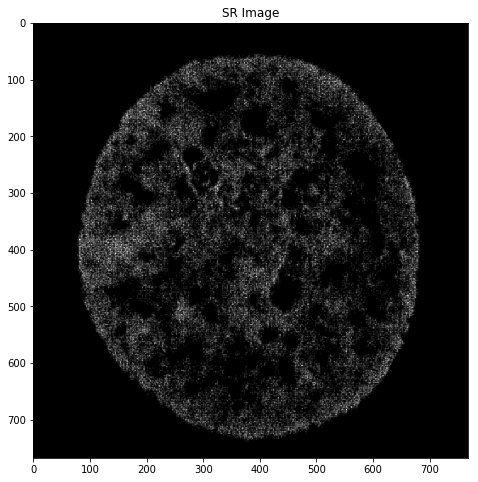

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [21]:
import matplotlib
import matplotlib.pyplot as pyplot

import storm_analysis.sa_utilities.hdf5_to_image as h5_image
#sigma=0.75 for chromatin
sr_im = h5_image.render2DImage("movie.hdf5", scale = 1, sigma =0.85)

fig=pyplot.figure(figsize = (8, 8))
pyplot.imshow(sr_im, cmap = "gray")
pyplot.title("SR Image")
pyplot.show()


#fig.savefig(r'C:\Users\Administrator\Documents\REVORGDATA\paper\extractedData\nanotagstirm\srim.tiff')

from scipy.misc import imsave
#x = np.zeros((255, 255))
#x = np.zeros((255, 255), dtype=np.uint8)
#x[:] = np.arange(255)
imsave('chromatin-forfig1-idu-stirmwhole.tiff', sr_im)

#import imageio
#im=sr_im
#im = np.zeros((255, 255), dtype=np.uint8)

#im = imageio.imread('imageio:astronaut.png')
#im.shape  # im is a numpy array
#(512, 512, 3)
#imageio.imwrite('astronaut-gray.tiff', im)

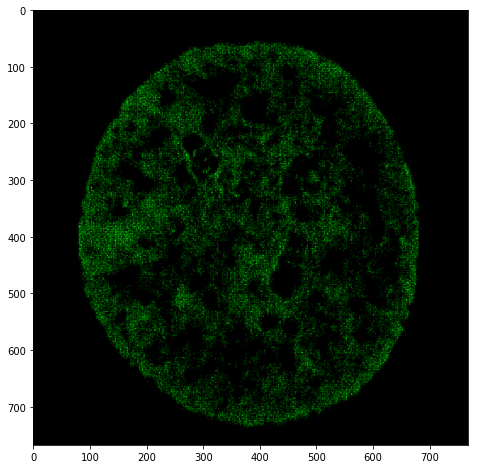

(768, 768, 3)


In [22]:
from PIL import Image
import numpy as np

from PIL import Image
im = Image.open('chromatin-forfig1-idu-stirmwhole.tiff')
#im = im.crop((200,200,400,400))

img = im



color=(0, 255, 0)
im = np.array(img)
#r, g, b, a = np.rollaxis(x, axis=-1)
#r[a == 0] = color[0]

#im=r


dim = np.zeros((768,768))

#select blue color for the image display and save
R = np.stack((dim,im, dim), axis=2)/255;

fig=pyplot.figure(figsize = (8, 8))
pyplot.imshow(R)
pyplot.show()
print(R.shape)



import matplotlib

matplotlib.image.imsave('chromatin-fig1b-idu-stirmcolorwhole.tiff', R)



rgb = np.zeros((255, 255, 3), dtype=np.uint8)
rgb[..., 0] = np.arange(255)
rgb[..., 1] = 55
rgb[..., 2] =  1- np.arange(255)

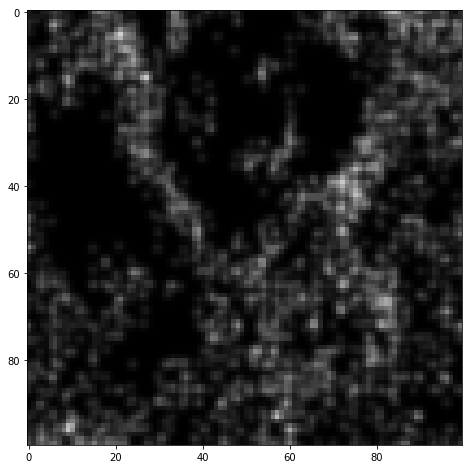

In [24]:

from PIL import Image
im = Image.open('chromatin-forfig1-idu-stirmwhole.tiff')
im = im.crop((250,250,350,350))
im.save('chromatin-fig1b-idu-stirmgray.tiff')

img = im
fig=pyplot.figure(figsize = (8, 8))


pyplot.imshow(img)


pyplot.show()

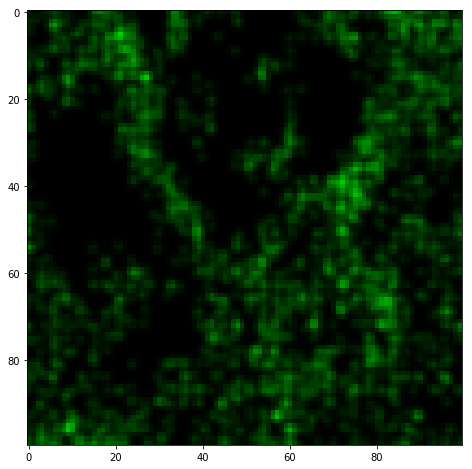

(100, 100, 3)


In [25]:
from PIL import Image
import numpy as np

color=(0, 255, 0)
im = np.array(img)
#r, g, b, a = np.rollaxis(x, axis=-1)
#r[a == 0] = color[0]

#im=r


dim = np.zeros((100,100))

#select blue color for the image display and save
R = np.stack((dim,im, dim), axis=2)/255;

fig=pyplot.figure(figsize = (8, 8))
pyplot.imshow(R)
pyplot.show()
print(R.shape)



import matplotlib

matplotlib.image.imsave('chromatin-fig1b-idu-stirmcolor.tiff', R)



rgb = np.zeros((255, 255, 3), dtype=np.uint8)
rgb[..., 0] = np.arange(255)
rgb[..., 1] = 55
rgb[..., 2] =  1- np.arange(255)

